### 3. 
В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

### 4. 
Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными.
Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

- логистическая регрессия по признакам X1,X2,X3;
- логистическая регрессия по признакам X4,X5,X6.
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

### 5.
В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

### 6.
Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

### 7. 
Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [60]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint
%pylab inline
from sklearn.cross_validation import train_test_split 
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


## train

In [25]:
alpha = 0.05
ppf = scipy.stats.norm.ppf(1 - alpha / 2.)
ppf

1.9599639845400538

In [26]:
cdf = scipy.stats.norm.cdf(1 - alpha / 2.)
cdf

0.83521987001968967

In [27]:
pdf = scipy.stats.norm.pdf(1 - alpha / 2.)
pdf

0.24801872461073715

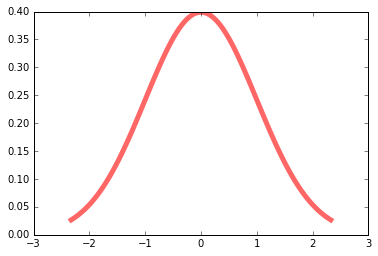

In [33]:
x = np.linspace(scipy.stats.norm.ppf(0.01), scipy.stats.norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, scipy.stats.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='pdf')

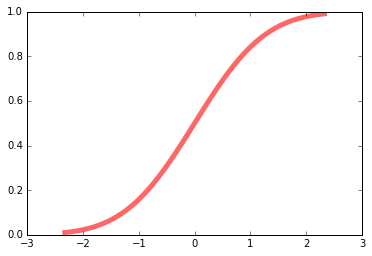

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, scipy.stats.norm.cdf(x), 'r-', lw=5, alpha=0.6, label='cdf')

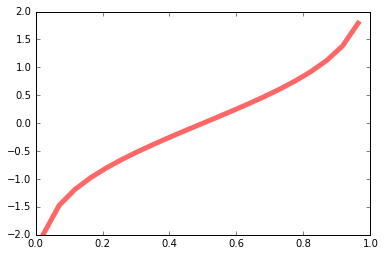

In [35]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, scipy.stats.norm.ppf(x), 'r-', lw=5, alpha=0.6, label='ppf')

## Task 3

In [36]:
def proportions_diff_confint_ind(a, n1, b, n2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(a) / n1
    p2 = float(b) / n2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

In [37]:
def proportions_diff_z_stat_ind(a, n1, b, n2):        
    p1 = float(a) / n1
    p2 = float(b) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [38]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [39]:
print "95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(10, 34, 4, 16)

95% confidence interval for a difference between proportions: [-0.217558, 0.305793]


In [100]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(10, 34, 4, 16), alternative='greater')

p-value: 0.372930


## Task 4

In [41]:
data = pd.read_csv('banknotes.txt', sep='\t')

In [42]:
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [43]:
data.describe()

,X1,X2,X3,X4,X5,X6,real
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500,0.500000
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266,0.501255
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000,0.000000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000,0.000000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000,0.500000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000,1.000000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000,1.000000


In [52]:
y = data['real']
X = data.drop('real', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=1)
X1_train = X_train[['X1', 'X2', 'X3']]
X2_train = X_train[['X4', 'X5', 'X6']]
X1_test = X_test[['X1', 'X2', 'X3']]
X2_test = X_test[['X4', 'X5', 'X6']]

In [61]:
lr1 = LogisticRegression()
lr1.fit(X1_train,y_train)
lr2 = LogisticRegression()
lr2.fit(X2_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
pred1 = lr1.predict(X1_test)
pred2 = lr2.predict(X2_test)

In [63]:
pred1[:5]

array([1, 1, 1, 0, 0], dtype=int64)

y_test[:5].values

In [82]:
a = [1 if v == y_test.values[i] else 0 for (i, v) in enumerate(pred1)]
b = [1 if v == y_test.values[i] else 0 for (i, v) in enumerate(pred2)]

In [83]:
sum(a), sum(b)

(40, 49)

In [84]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [85]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [86]:
print "95%% confidence interval for a difference between proportions: [%f, %f]" \
      % proportions_diff_confint_rel(a, b)

95% confidence interval for a difference between proportions: [-0.300055, -0.059945]


In [87]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_rel(a, b))

p-value: 0.003297


## Task 6

In [95]:
def get_z_score(sample_mean, pop_mean, sigma, n):
    return float((sample_mean - pop_mean)) / (float(sigma) / np.sqrt(n))

In [96]:
def get_p_value(z):
    return 1 - scipy.stats.norm.cdf(z)

In [97]:
get_p_value(get_z_score(541.4, 525, 100, 100))

0.050502583474103968

In [98]:
get_p_value(get_z_score(541.5, 525, 100, 100))

0.049471468033648103